In [4]:
import pandas as pd
df = pd.read_csv("/kaggle/input/air-quality-data-in-india-2015-2024/city_day.csv")

print("\nFirst five rows:\n")
print(df.head())

print("\nLast five rows:\n")
print(df.tail())

print("\nColumn names:\n")
print(df.columns)

print("\nNumber of rows and columns:\n")
print(df.shape)

print("\nInfo:\n")
df.info()



First five rows:

        City    Datetime  PM2.5   PM10     NO   NO2    NOx   NH3    CO   SO2  \
0      Delhi  2015-01-01  153.3  241.7  182.9  33.0   81.3  38.5  1.87  64.5   
1     Mumbai  2015-01-01   70.5  312.7  195.0  42.0  122.5  31.5  7.22  83.8   
2    Chennai  2015-01-01  174.1  275.4   56.2  68.8  230.9  28.5  8.56  60.8   
3    Kolkata  2015-01-01  477.2  543.9   14.1  76.4  225.9  45.6  2.41  42.1   
4  Bangalore  2015-01-01  171.6  117.7  123.3  12.4   61.9  49.7  1.26  79.7   

      O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
0   83.6    18.93    20.81    8.32  204.5        Severe  
1  108.0     2.01    19.41    2.86   60.9  Satisfactory  
2   43.9    19.07    10.19    9.63  486.5        Severe  
3  171.1     9.31    11.65    9.39  174.4     Very Poor  
4  164.3     6.04    12.74    9.59  489.7          Good  

Last five rows:

            City    Datetime  PM2.5   PM10     NO    NO2    NOx   NH3    CO  \
18260      Delhi  2024-12-31  371.2   61.7   14.6  130.


Feature Engineering

Dataset after Feature Engineering
    Datetime  year  month  day
0 2015-01-01  2015      1    1
1 2015-01-01  2015      1    1
2 2015-01-01  2015      1    1
3 2015-01-01  2015      1    1
4 2015-01-01  2015      1    1

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        18265 non-null  object        
 1   Datetime    18265 non-null  datetime64[ns]
 2   PM2.5       18265 non-null  float64       
 3   PM10        18265 non-null  float64       
 4   NO          18265 non-null  float64       
 5   NO2         18265 non-null  float64       
 6   NOx         18265 non-null  float64       
 7   NH3         18265 non-null  float64       
 8   CO          18265 non-null  float64       
 9   SO2         18265 non-null  float64       
 10  O3          18265 non-null  float64       
 11  Benzene     1

/tmp/ipykernel_55/622024095.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_55/622024095.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

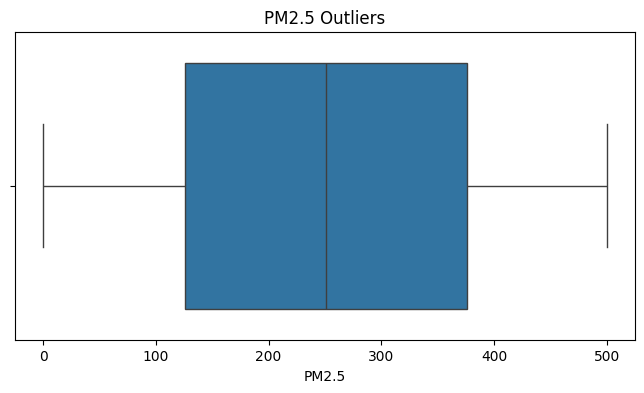


Outlier Detection using Z-score: (0, 20)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
df = pd.read_csv("/kaggle/input/air-quality-data-in-india-2015-2024/city_day.csv")

print("\nFeature Engineering\n")

df['Datetime'] = pd.to_datetime(df['Datetime'])

df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day

print("Dataset after Feature Engineering")
print(df[['Datetime', 'year', 'month', 'day']].head())

print("\nInfo:")
df.info()

print("\nColumns:")
print(df.columns)

print("\nHandling Missing Values\n")

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isnull().sum())
print("\nOutlier Detection using IQR")

col = 'PM2.5'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower) | (df[col] > upper)]

print("Number of Outliers Detected:", outliers.shape[0])
print(outliers[[col]].head())

print("\nOutlier Visualization - Box plot\n")

plt.figure(figsize=(8,4))
sns.boxplot(x=df[col])
plt.title(f"{col} Outliers")
plt.show()


df[f'{col}_zscore'] = zscore(df[col])
outliers_z = df[np.abs(df[f'{col}_zscore']) > 3]

print("\nOutlier Detection using Z-score:", outliers_z.shape)
